# SUPER MARKET SALES PREDICTIONS
# Geronimo Fernandez

# Objetivo:
# El objetivo de este proyecto es analizar los datos de ventas de un supermercado con el fin de descubrir insights interesantes que puedan ser útiles para mejorar la estrategia de ventas y toma de decisiones a traves de visualizaciones.

# El conjunto de datos utilizado proviene de un archivo CSV titulado supermarket_sales.csv originario de kaggle, que contiene información sobre las transacciones realizadas por los clientes en diferentes sucursales del supermercado. Las variables disponibles incluyen información sobre el cliente, el producto, la cantidad comprada, el precio, el método de pago, entre otros aspectos que podrían ofrecer una perspectiva integral sobre las ventas.

# Contexto Comercial:
# El dataset proporciona datos transaccionales de un supermercado con información clave como métodos de pago, líneas de productos, y la distribución de ventas por género y ubicación geográfica. Este análisis puede ayudar a optimizar inventarios, mejorar la experiencia del cliente, y aumentar las ganancias.

# Contexto analitico:
# Utilizaremos técnicas de análisis exploratorio de datos (EDA) para generar insights clave. El enfoque será identificar tendencias de ventas, evaluar la relación entre variables y explorar los métodos de pago y productos preferidos.Despues utilizaremos un modelo de machine learning llamado 'DecisionTreeClassifier' para buscar patrones que permitan anticipar si el cliente pagara en efectivo, con tarjeta de credito o mediante un e-wallet.

# Tipo de Aprendizaje: El modelo de árbol de decisión que hemos utilizado se enmarca dentro del aprendizaje supervisado.El modelo se entrena utilizando un conjunto de datos donde cada entrada está asociada a una etiqueta o resultado conocido. En mi caso, las observaciones corresponden a transacciones de clientes en un supermercado, y las etiquetas son los métodos de pago utilizados (efectivo, tarjeta de crédito, e-wallet).El objetivo a predecir es el método de pago que un cliente utilizará en una transacción en un supermercado.

# Listado de variables y breve explicacion:

# Invoice ID: Identificador único de la factura.
# Branch: Sucursal donde se realizó la venta.
# City: Ciudad en la que se encuentra la sucursal.
# Customer type: Tipo de cliente (miembro o no miembro).
# Gender: Género del cliente.
# Product line: Línea de productos comprados.
# Unit price: Precio por unidad del producto.
# Quantity: Cantidad de productos comprados.
# Tax 5%: Impuesto aplicado sobre la venta.
# Total: Total de la venta, incluyendo impuestos.
# Date: Fecha en que se realizó la transacción.
# Time: Hora en la que se realizó la transacción.
# Payment: Método de pago utilizado.
# Cogs: Costos de los productos vendidos.
# Gross margin percentage: Porcentaje de margen bruto de la venta.
# Gross income: Ingreso bruto generado por la venta.
# Rating: Valoración del cliente sobre la compra.

# Preguntas de hipotesis:

# Preferencia de pago: ¿Existe una relación entre el método de pago y la cantidad total de la compra? Por ejemplo, ¿las compras con tarjeta de crédito    tienden a tener montos más altos que las realizadas en efectivo?

# Ventas según el día de la semana: ¿Se observa un incremento en las ventas en ciertos días de la semana? Por ejemplo, ¿hay más ventas durante los fines de semana?

In [3]:
!pip install pandas numpy

In [4]:
from google.colab import files
uploaded = files.upload()

import os
os.listdir()

import pandas as pd

# Suponiendo que el archivo se llame 'supermarket_sales.csv'
df = pd.read_csv('supermarket_sales.csv')

# Ver las primeras filas del DataFrame
df.head()

Saving supermarket_sales.csv to supermarket_sales.csv


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [6]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

<ipython-input-6-6eaf9c51d1da>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


In [ ]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [7]:
# Resumen estadístico de las variables numéricas
df.describe()


Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000             4.761905e+00   
75%           2019-03-08 00:00:00   448.90500             4.761905e+00   
max           2019-03-30 00:00:00   993.00000             4.761905e+00   
std                           NaN   234.17651             6.131498e-14   

       gross income      Rating  
count   1000.000000  1000.00000  
mean      15.379369     6.97270  
min        0.508500     4.00000  
25%        5.924875     5.50000  
50%       12.088000     7.00000  
75%       22.445250     8.50000  
max       49.650000    10.00000  
std       11.708825     1.71858

In [8]:
!pip install seaborn
!pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

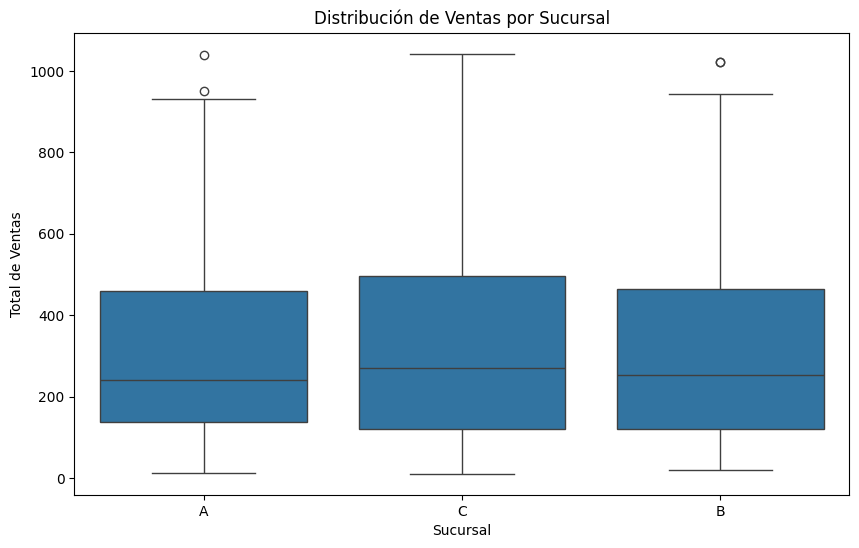

In [ ]:
# Boxplot para mostrar la distribucion de ventas por sucursal:

plt.figure(figsize=(10,6))
sns.boxplot(x='Branch', y='Total', data=df)
plt.title('Distribución de Ventas por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Total de Ventas')
plt.show()


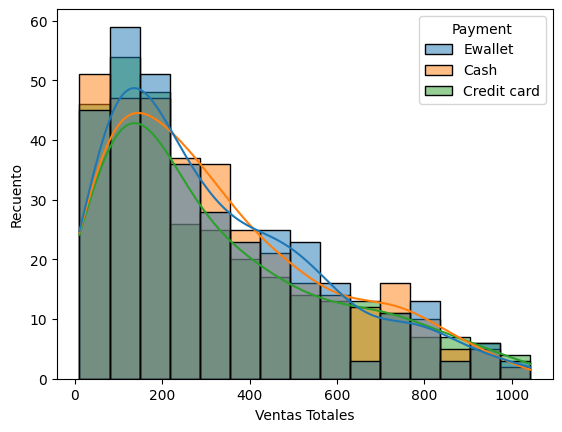

In [ ]:
#Histograma ventas totales por metodo de pago:
df = df.dropna(subset=['Payment'])
sns.histplot(df, x='Total', bins=15, kde=True, hue='Payment')
plt.xlabel('Ventas Totales')
plt.ylabel('Recuento')
plt.show()

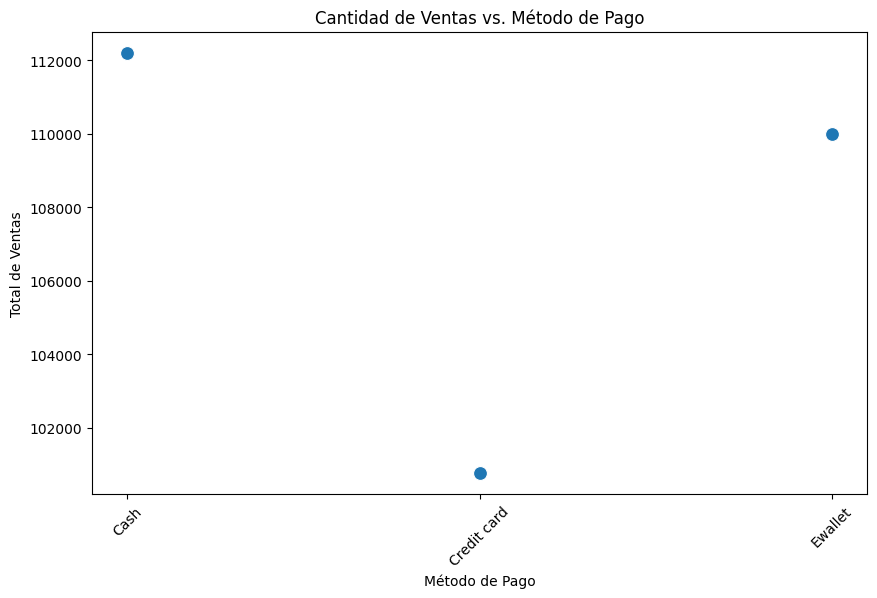

In [ ]:
# Grafico de dispersion 'Cantidad de Ventas vs. Método de Pago':
df_ = df.groupby('Payment').agg({'Total': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Payment', y='Total', data=df_, s=100)

plt.title('Cantidad de Ventas vs. Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.show()



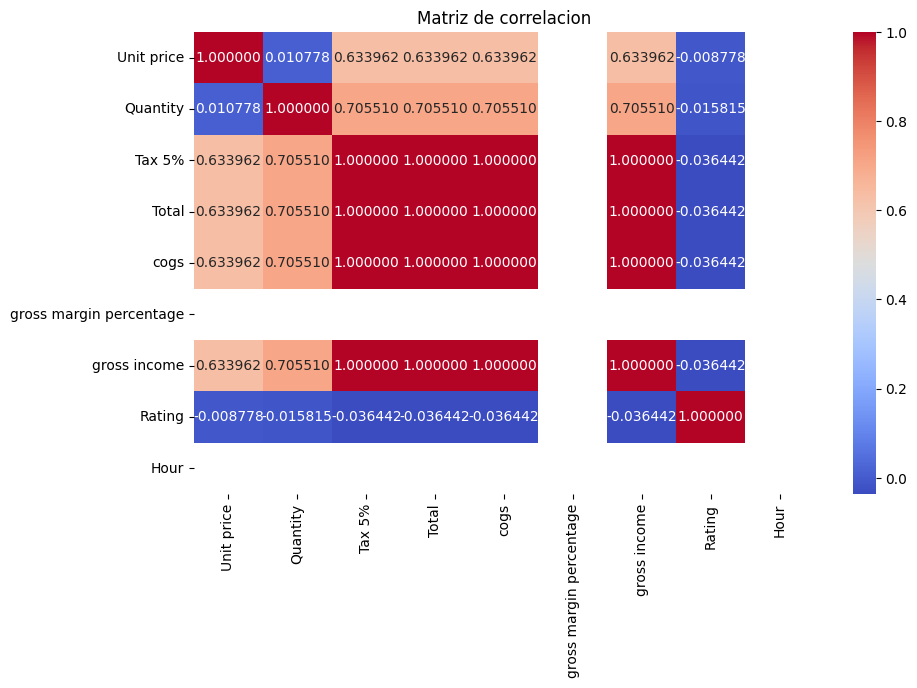

In [ ]:
# Matriz de Correlación
df_numeros = df.select_dtypes(include=['number'])
Matriz_correlacion = df_numeros.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(Matriz_correlacion, annot=True, cmap='coolwarm', fmt='2f')
plt.title('Matriz de correlacion')
plt.show()

Text(0, 0.5, 'Productos:')

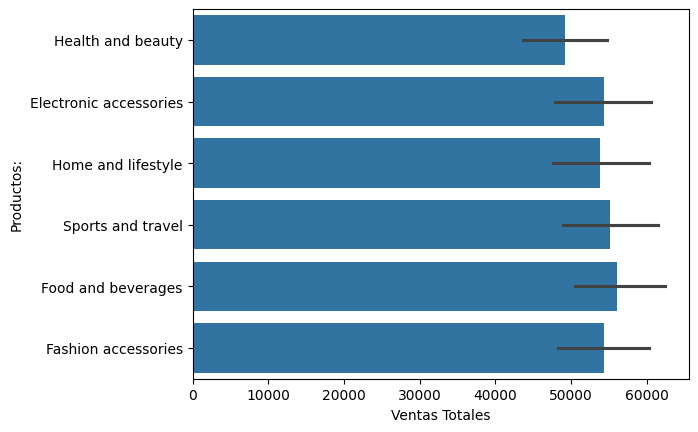

In [ ]:
# Gráfico de barras sumando las ventas por categoría de producto

import numpy as np
sns.barplot(x='Total', y='Product line', data=df, estimator= np.sum)
plt.xlabel('Ventas Totales')
plt.ylabel('Productos:')

In [ ]:
'''Checklist de EDA
  -Limpieza de datos
  -Resumen estadístico general: (describe()).
  -Visualización de datos categóricos (Branch, Customer type, Product line).
  -Análisis temporal (Day_of_week, Hour).
  -Análisis de correlación (hecho, pero puede mejorar con insights específicos).'''

In [9]:
# Procesamiento de datos para el modelo:

df['Unit price'] = df['Unit price'].fillna(df['Unit price'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Tax 5%'] = df['Tax 5%'].fillna(df['Tax 5%'].mean())
df['Total'] = df['Total'].fillna(df['Total'].mean())

df['Branch'] = df['Branch'].fillna(df['Branch'].mode()[0])
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])
df['Customer type'] = df['Customer type'].fillna(df['Customer type'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [10]:
X = df[['Unit price', 'Quantity', 'Tax 5%', 'Customer type', 'Gender', 'Branch']]
y = df['Payment']


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Unit price', 'Quantity', 'Tax 5%']),
        ('cat', OneHotEncoder(), ['Customer type', 'Gender', 'Branch'])
    ])


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



# Evaluación en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluación en el conjunto de prueba (ya tienes esto, pero lo dejo para claridad)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.4750
Training Classification Report:
              precision    recall  f1-score   support

        Cash       0.48      0.58      0.53       272
 Credit card       0.45      0.51      0.48       253
     Ewallet       0.49      0.34      0.40       275

    accuracy                           0.47       800
   macro avg       0.48      0.48      0.47       800
weighted avg       0.48      0.47      0.47       800

Test Accuracy: 0.3300
Test Classification Report:
              precision    recall  f1-score   support

        Cash       0.35      0.36      0.35        72
 Credit card       0.30      0.36      0.33        58
     Ewallet       0.34      0.27      0.30        70

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.33      0.33      0.33       200



In [ ]:
'''Conclusiones: a pesar de la precisión relativamente baja, el árbol de decisión ha ofrecido valiosos insights sobre las relaciones entre las características del cliente y
   sus métodos de pago. como por ejemplo: :

   - El modelo tiene una precisión del 100% en el conjunto de entrenamiento, lo que indica que se ha ajustado perfectamente a los datos de entrenamiento.
   - El modelo tiene una precision relativamente más alta para predecir pagos con efectivo, lo que indica que, cuando el modelo predice que un cliente pagará en efectivo, es más probable que esté acertado.
   - La recall de pago con tarjeta de credito es más alto (0.41) en comparación con la precision (0.32), lo que indica que el modelo es más eficiente para identificar clientes que utilizan tarjeta de crédito, pero a costa de cometer más errores de predicción
   - Los resultados sugieren un posible desbalance en la distribución de los métodos de pago, lo que podría estar afectando la capacidad del modelo para predecir de manera efectiva.
   - El modelo tiene un desempeño muy bajo en el conjunto de prueba, con una precisión general del 36%. Esto indica que el modelo no logra replicar los patrones aprendidos en datos nuevos.
   - Hay variaciones en el desempeño entre las clases:
     La clase Cash tiene la mayor precisión (40%), pero su recall es bajo (35%), lo que sugiere que algunos pagos en efectivo son clasificados erróneamente como otra categoría.
     La clase Credit Card tiene el mayor recall (41%) pero baja precisión (32%), indicando que el modelo clasifica muchos ejemplos como "Credit Card", incluso cuando no lo son.
     La clase Ewallet tiene un desempeño similar, pero ningún indicador destaca en particular.
     Esto muestra que el modelo no tiene un buen equilibrio en su capacidad para clasificar correctamente todas las categorías.

     Resumen conclusiones: El modelo de árbol de decisión muestra un claro sobrefit, con un desempeño perfecto en los datos de entrenamiento (100% de precisión) pero un bajo desempeño en los datos de prueba (36% de precisión).
     Esto indica que el modelo está memorizando los datos de entrenamiento en lugar de identificar patrones generalizables.
     Además, se observó un desbalance en el desempeño entre las clases, donde ninguna categoría fue clasificada consistentemente bien en el conjunto de prueba.
     Variables redundantes, como Tax 5%, y la complejidad del modelo (falta de regularización) podrían estar contribuyendo al sobreajuste.'''
